# Comenzamos con el procesamiento de imágenes (1)

Este Notebook servirá para probar brevemente la instalación y puesta a punto de scikit-image

Este es el paquete principal que necesitamos. En el podremos encontrar los elementos necesarios para hacer un procesamiento de imágenes tanto básico como avanzado.

In [1]:
# Para procesar las imágenes
from skimage import data

Vamos a ver primero qué tipo de imágenes contiene. Para ello, escribimos *data.* y le damos al tabulador.

In [2]:
coins = data.coins() # Cargamos la imagen de una moned

In [3]:
coins.shape

(303, 384)

¿Qué contiene *coins*?¿Qué aspecto tiene?

Es una array de tamaño {{coins.shape[0]}} filas x{{coins.shape[1]}} columnas, con valores comprendidos entre 0 y 255. Estos valores son los empleados para representar el negro (0) y el blanco (255). 

Vamos a ver ahora cuáles son los 10 primeros elementos por fila y por columna.

In [4]:
coins

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

In [5]:
coins[1:10,1:10]

array([[144, 145, 143, 145, 132, 135, 133, 134, 133],
       [147, 143, 147, 145, 132, 136, 133, 134, 132],
       [136, 133, 139, 136, 130, 138, 133, 133, 131],
       [133, 134, 135, 129, 130, 137, 128, 132, 130],
       [133, 137, 132, 127, 133, 135, 126, 131, 130],
       [130, 133, 130, 131, 135, 132, 130, 130, 129],
       [130, 131, 130, 135, 135, 128, 132, 129, 129],
       [134, 136, 133, 129, 129, 129, 128, 131, 129],
       [130, 133, 131, 129, 129, 129, 129, 129, 128]], dtype=uint8)

¿Y qué aspecto tiene esta imagen?¿Cómo podemos visualizarlo?

In [6]:
# Para mostrar las imágenes
import matplotlib.pyplot as plt

In [8]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

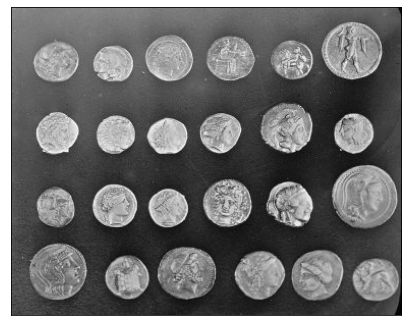

In [9]:
imshow(coins)

¿Y cómo representa python internamente estas imágenes? Vamos a verlo con el comando *type*

In [10]:
type(coins)

numpy.ndarray

Parece entonces, que si queremos trabajar con imágenes, necesitamos además el paquete *numpy* el cual es uno de los más comunes y empleados en el procesamiento de datos.

In [11]:
import numpy as np

La razón por la cual lo ejecutamos como *as np* es facilitar la posterior referencia a dicho paquete. De esta manera, y escribiendo *np.* más el tabulador, podremos ver todas las opciones y funciones que este paquete nos ofrece.

In [13]:
# np.

Vamos a calcular ahora el máximo de la matriz. Como hemos visto antes, es una imagen en escala de grises. Luego, si existiera algún pixel muy blanco (representado por un 255), éste será el máximo.

In [14]:
np.max(coins)

252

Con lo cual, el máximo de esta imagen es {{np.max(coins)}} que está muy cerca del máximo total (255).

Por otro lado, el mínimo se calcularía de forma similar y tendríamos que dicho mínimo es {{np.min(coins)}}.

¿Y cómo lo haríamos para calcular el máximo por fila y columna? Muy sencillo, para eso, tenemos que hacer uso del parámetro *axis* que indica que la operación de *numpy* concreta que queramos ejecutar se realizará por columnas *axis=0* o por filas *axis=1*.

Vamos a verlo primero con un ejemplo más sencillo, antes de acudir a la imagen.

In [15]:
# Tomemos un array de 16 elementos y hagamos un array de 4x4
a = np.arange(16).reshape((4,4))

In [16]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

Vamos a calcular el máximo como antes:

In [17]:
np.max(a)

15

Ahora vamos a calcular el máximo por columnas, haciendo uso del parámetro *axis=0*. En general, para ver todas las alternativas de parámetros que nos ofrece una función, deberemos de presionar tabulador después de una coma.

In [18]:
np.max(a,)

15

In [19]:
# Máximos por columnas
np.max(a,axis=0)

array([12, 13, 14, 15])

In [20]:
# Máximos por filas
np.max(a,axis=1)

array([ 3,  7, 11, 15])

Y volviendo a nuestro ejemplo de la imagen, vamos a calcular el máximo por columnas y por filas.

In [21]:
# Máximos por columnas
max_per_column = np.max(coins,axis=0)

In [22]:
len(max_per_column)

384

In [19]:
max_per_column

array([132, 147, 145, 150, 145, 135, 138, 135, 134, 133, 131, 133, 137,
       138, 134, 131, 132, 131, 132, 166, 165, 171, 170, 216, 197, 240,
       243, 242, 233, 237, 243, 239, 231, 228, 228, 231, 238, 238, 236,
       238, 235, 238, 233, 238, 233, 239, 232, 231, 235, 249, 235, 233,
       227, 243, 243, 252, 232, 242, 231, 243, 239, 243, 248, 242, 244,
       249, 212, 212, 178, 169, 188, 174, 174, 213, 137, 135, 134, 134,
       135, 136, 172, 240, 234, 233, 235, 245, 235, 238, 232, 231, 240,
       235, 248, 223, 245, 228, 225, 228, 229, 220, 227, 227, 226, 226,
       220, 232, 230, 229, 224, 212, 223, 229, 231, 226, 232, 234, 232,
       237, 235, 234, 236, 236, 229, 208, 204, 200, 209, 193, 198, 208,
       204, 212, 206, 226, 235, 225, 236, 247, 235, 227, 232, 237, 238,
       238, 233, 235, 232, 236, 234, 230, 226, 237, 226, 224, 225, 224,
       225, 230, 233, 239, 233, 244, 234, 233, 229, 228, 229, 243, 231,
       237, 236, 241, 241, 239, 221, 228, 231, 224, 199, 208, 19

In [23]:
# Máximos por filas
max_per_row = np.max(coins,axis=1)

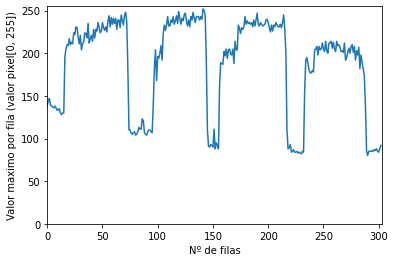

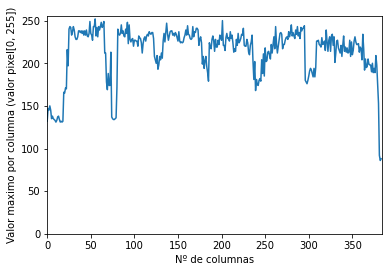

In [36]:
# Representar ahora el máximo por filas
plt.plot(max_per_row)

plt.xlabel('Nº de filas')
plt.xlim((0,len(max_per_row)))

plt.ylabel('Valor maximo por fila (valor pixel[0, 255])')
plt.ylim(0, 255)
plt.show()

# El patrón que observamos se debe a las monedas. 
    # Sin moneda tenemos valores maximos menores -> Más oscuro
    # Con moneda tenemos valotes maximos mayores -> Más blanco
    # Nota: 
        # 0   -> Maximo oscuro
        # 255 -> Maximo blanco
# Hemos encontrado patrón para detectar objetos por imagenes

# Representar ahora el máximo por columnas
plt.plot(max_per_column)

plt.xlabel('Nº de columnas')
plt.xlim((0,len(max_per_column)))

plt.ylabel('Valor maximo por columna (valor pixel[0, 255])')
plt.ylim(0, 255)
plt.show()

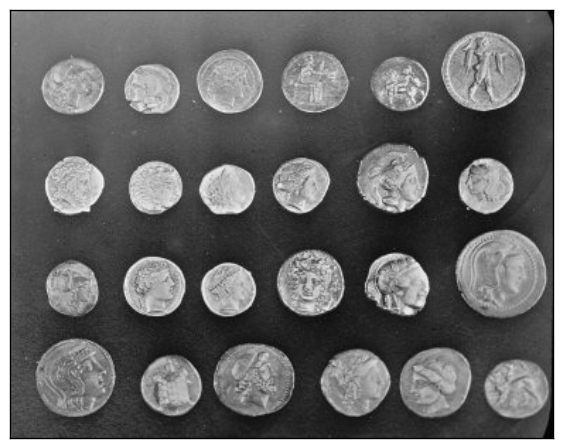

In [22]:
# Pintemos la imagen de nuevo, a ver si observamos algo
imshow(coins)